1.Загружаем библиотеки

In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline
# %matplotlib notebook
from scipy import stats
import copy
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score, mean_squared_error
print(tf.__version__)

#загрузка библиотек






from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


2.11.0


In [90]:
!pip install termcolor
!pip install colorama
import colorama
from colorama import Fore, Style  # цветные строки
from termcolor import colored
from termcolor import cprint

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


2.Анализ датасета

2.1 Загрузка таблиц

In [91]:
# чтение данных из первой таблицы
df1 = pd.read_excel("/content/drive/MyDrive/Датасет для ВКР_композиты/X_nup.xlsx")
# чтение данных из второй таблицы
df2 = pd.read_excel("/content/drive/MyDrive/Датасет для ВКР_композиты/X_bp.xlsx")


In [92]:
df1.head()

,Unnamed: 0,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0,0,4.0,57.0
1,1,0,4.0,60.0
2,2,0,4.0,70.0
3,3,0,5.0,47.0
4,4,0,5.0,57.0


In [93]:
df1.info(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1040 non-null   int64  
 1   Угол нашивки, град  1040 non-null   int64  
 2   Шаг нашивки         1040 non-null   float64
 3   Плотность нашивки   1040 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 32.6 KB


In [94]:
df2.head()

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0
1,1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0
2,2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0
3,3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0
4,4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0


In [95]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            1023 non-null   int64  
 1   Соотношение матрица-наполнитель       1023 non-null   float64
 2   Плотность, кг/м3                      1023 non-null   float64
 3   модуль упругости, ГПа                 1023 non-null   float64
 4   Количество отвердителя, м.%           1023 non-null   float64
 5   Содержание эпоксидных групп,%_2       1023 non-null   float64
 6   Температура вспышки, С_2              1023 non-null   float64
 7   Поверхностная плотность, г/м2         1023 non-null   float64
 8   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 9   Прочность при растяжении, МПа         1023 non-null   float64
 10  Потребление смолы, г/м2               1023 non-null   float64
dtypes: float64(10), i

2.2 Объединение таблиц по индексу по типу "inner"

In [96]:

# объединение таблиц по индексу с типом объединения Inner
df1.rename(columns={df1.columns[0]:'id'},inplace=True)
df2.rename(columns={df2.columns[0]:'id'},inplace=True)

df = pd.merge(df1, df2, how="inner", on="id")

df.drop('id', axis=1, inplace=True)

# сохранение объединенной таблицы в Excel файл
df.to_excel('/content/drive/MyDrive/Датасет для ВКР_композиты/merged_file.xlsx', index=True)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Угол нашивки, град                    1023 non-null   int64  
 1   Шаг нашивки                           1023 non-null   float64
 2   Плотность нашивки                     1023 non-null   float64
 3   Соотношение матрица-наполнитель       1023 non-null   float64
 4   Плотность, кг/м3                      1023 non-null   float64
 5   модуль упругости, ГПа                 1023 non-null   float64
 6   Количество отвердителя, м.%           1023 non-null   float64
 7   Содержание эпоксидных групп,%_2       1023 non-null   float64
 8   Температура вспышки, С_2              1023 non-null   float64
 9   Поверхностная плотность, г/м2         1023 non-null   float64
 10  Модуль упругости при растяжении, ГПа  1023 non-null   float64
 11  Прочность при рас

In [98]:
df.head()

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,0,4.0,57.0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0
1,0,4.0,60.0,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0
2,0,4.0,70.0,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0
3,0,5.0,47.0,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0
4,0,5.0,57.0,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0


2.3 Описательная статистика данных

In [99]:
df.describe()

#Если среднее значение и стандартное отклонение очень близки друг к другу или стандартное отклонение больше среднего, у нас может возникнуть проблема с выбросом этого признака.
#Если есть разрыв между min и Q1 или между Q3 и max, это может быть признаком выброса.
#Прямая смещается в направлении выброса, когда есть выброс.


,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,44.252199,6.899222,57.153929,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144
std,45.015793,2.563467,12.350969,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,3.118983,485.628006,59.735931
min,0.000000,0.000000,0.000000,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,64.054061,1036.856605,33.803026
25%,0.000000,5.080033,49.799212,2.317887,1924.155467,500.047452,92.443497,20.608034,259.066528,266.816645,71.245018,2135.850448,179.627520
50%,0.000000,6.916144,57.341920,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882
75%,90.000000,8.586293,64.944961,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,75.356612,2767.193119,257.481724
max,90.000000,14.440522,103.988901,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628


In [100]:
#Проверить наличие пропущенных значений
df.isnull().sum()

Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
dtype: int64

In [101]:
#наличие дупликатов
df.duplicated().sum()

0

**2.4 Разведочный анализ (EDA)**

2.4.1 Распределение значений в каждом столбце(histplot)

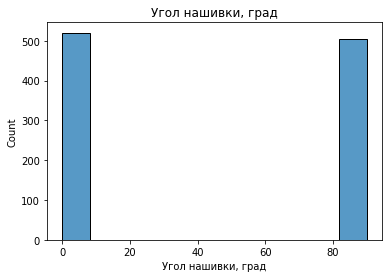

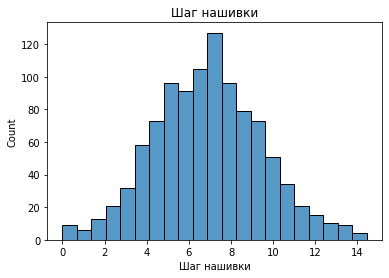

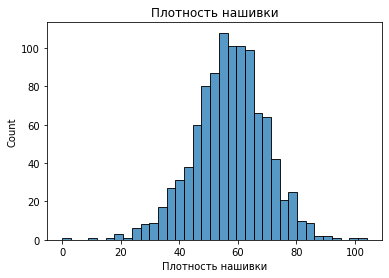

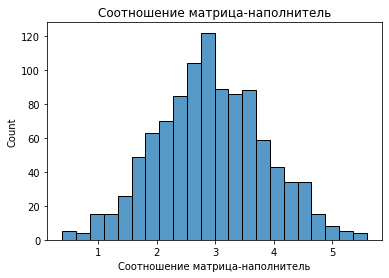

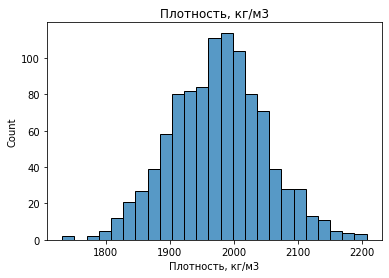

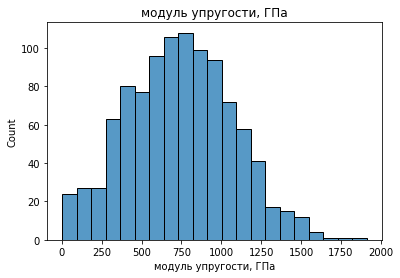

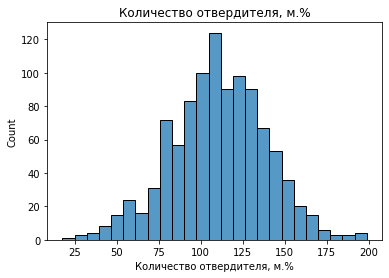

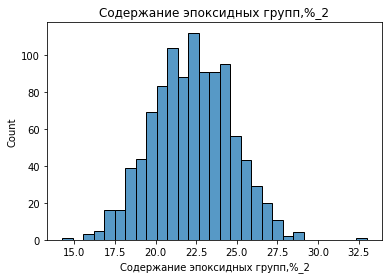

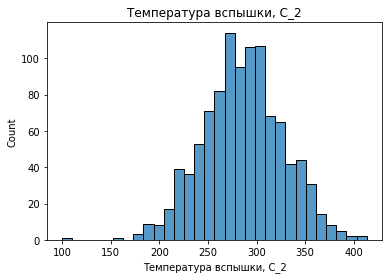

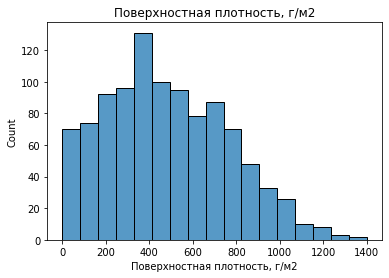

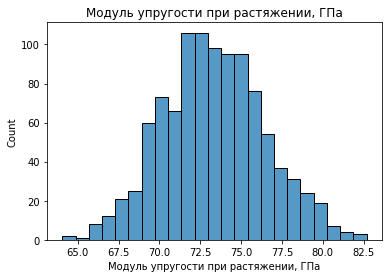

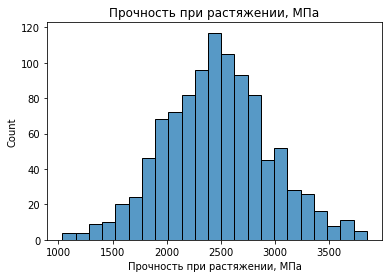

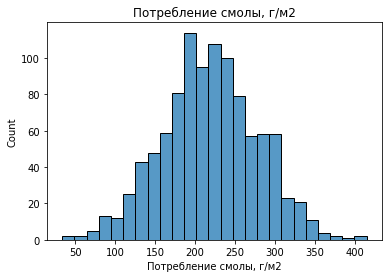

In [102]:
#Изучить распределение значений в каждом столбце:

for column in df.columns:
    plt.figure()
    sns.histplot(df[column])
    plt.title(column)

2.4.2 Сводный анализ по трем графикам (частотность, выбросы, плотность распределения)

In [103]:
#свод данных по столбцу
def summary(column):
    print(colored("Column: ",'yellow', attrs=['bold']), column)
    print(colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Missing values: ", 'yellow', attrs=['bold']), df[column].isnull().sum())
    print(colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Missing values(%): ", 'yellow', attrs=['bold']), round(df[column].isnull().sum()/df.shape[0]*100, 2))
    print(colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Unique values: ", 'yellow', attrs=['bold']), df[column].nunique())
    print(colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Value counts: \n", 'yellow', attrs=['bold']), df[column].value_counts(dropna = False), sep='')
    print(colored('*'*100, 'red', attrs=['bold']), sep='')


In [104]:
#код для плотности распределения

def show_distribution_density(col):

    min_val = col.min()
    max_val = col.max()
    mean_val = col.mean()
    med_val = col.median()
    mod_val = col.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    fig = plt.figure(figsize = (15,10))
    
    plt.subplot(3, 1, 1)
    plt.hist(col)
    plt.ylabel('Frequency', fontsize=10)
    plt.axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2, label='Minimum')
    plt.axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2, label='Mean')
    plt.axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2, label='Median')
    plt.axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2, label='Mode')
    plt.axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2, label='Maximum')
    plt.legend(loc='upper right')
    
    plt.subplot(3, 1, 2) 
    plt.boxplot(col, vert=False)
    
    plt.subplot(3, 1, 3)
    col.plot.density()
    plt.axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2, label='Minimum')
    plt.axvline(x=col.mean(), color = 'cyan', linestyle='dashed', linewidth = 2, label = 'Mean')
    plt.axvline(x=col.median(), color = 'red', linestyle='dashed', linewidth = 2, label = 'Median')
    plt.axvline(x=col.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2, label = 'Mode')
    plt.axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2, label='Maximum')
    plt.legend(loc='upper right')

    fig.suptitle('Column Distribution & Density', fontsize=15)
    
    plt.show()   

In [105]:
#функция для выбросов
def outlier(col):
    print('Num_Outliers:', len(list(i for i in col if i > (np.percentile(col, 75) + 1.5 * stats.iqr(col)) or \
                              i < (np.percentile(col, 25) - 1.5 * stats.iqr(col)))))

    print('Outliers    :', sorted(list(i for i in col if i > (np.percentile(col, 75) + 1.5 * stats.iqr(col)) or \
                              i < (np.percentile(col, 25) - 1.5 * stats.iqr(col)))))

Column:  Угол нашивки, град
****************************************************************************************************
Missing values:  0
****************************************************************************************************
Missing values(%):  0.0
****************************************************************************************************
Unique values:  2
****************************************************************************************************
Value counts: 
0     520
90    503
Name: Угол нашивки, град, dtype: int64
****************************************************************************************************
Minimum:0.00
Mean:44.25
Median:0.00
Mode:0.00
Maximum:90.00



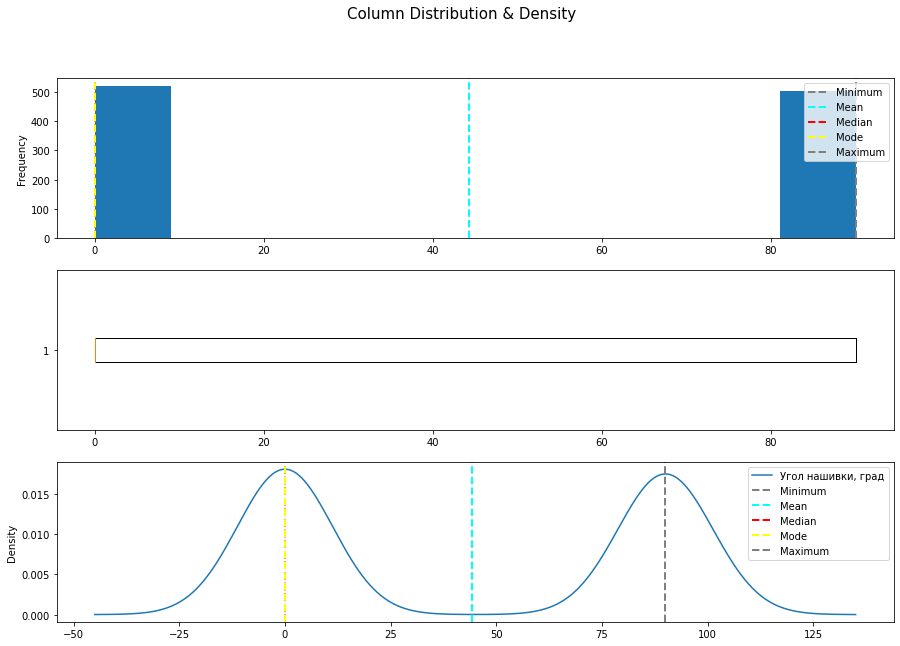

Num_Outliers: 0
Outliers    : []
Column:  Шаг нашивки
****************************************************************************************************
Missing values:  0
****************************************************************************************************
Missing values(%):  0.0
****************************************************************************************************
Unique values:  989
****************************************************************************************************
Value counts: 
7.000000     8
9.000000     8
10.000000    8
5.000000     8
4.000000     7
            ..
8.779019     1
2.786071     1
10.402629    1
6.818547     1
6.078902     1
Name: Шаг нашивки, Length: 989, dtype: int64
****************************************************************************************************
Minimum:0.00
Mean:6.90
Median:6.92
Mode:5.00
Maximum:14.44



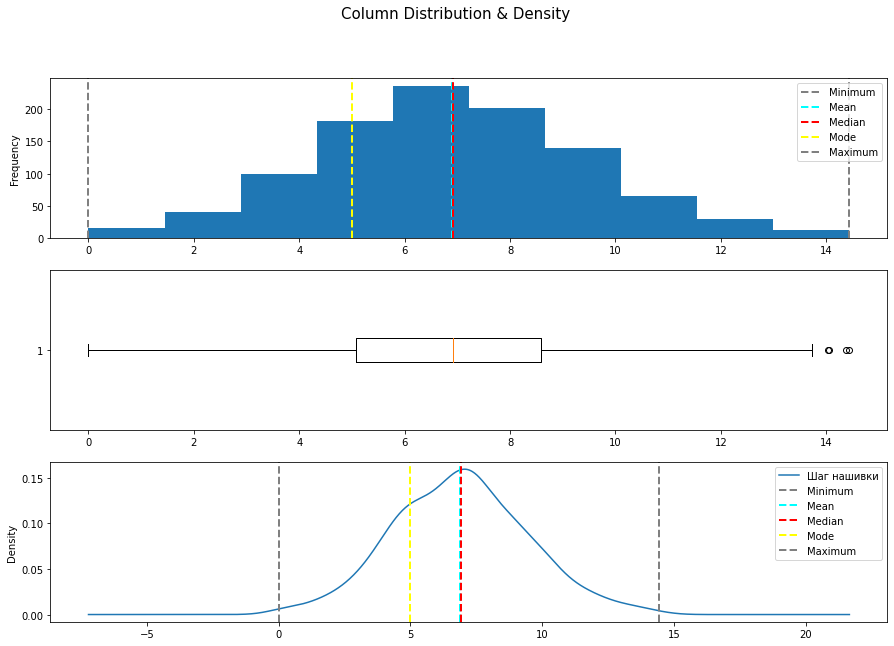

Num_Outliers: 4
Outliers    : [14.0332153037961, 14.0513828180002, 14.3764512763632, 14.4405218753969]
Column:  Плотность нашивки
****************************************************************************************************
Missing values:  0
****************************************************************************************************
Missing values(%):  0.0
****************************************************************************************************
Unique values:  988
****************************************************************************************************
Value counts: 
57.000000    10
70.000000    10
60.000000    10
47.000000     9
56.260700     1
             ..
43.709842     1
70.922716     1
70.169846     1
63.078186     1
77.434468     1
Name: Плотность нашивки, Length: 988, dtype: int64
****************************************************************************************************
Minimum:0.00
Mean:57.15
Median:57.34
Mode:57.00
Maximum:103.

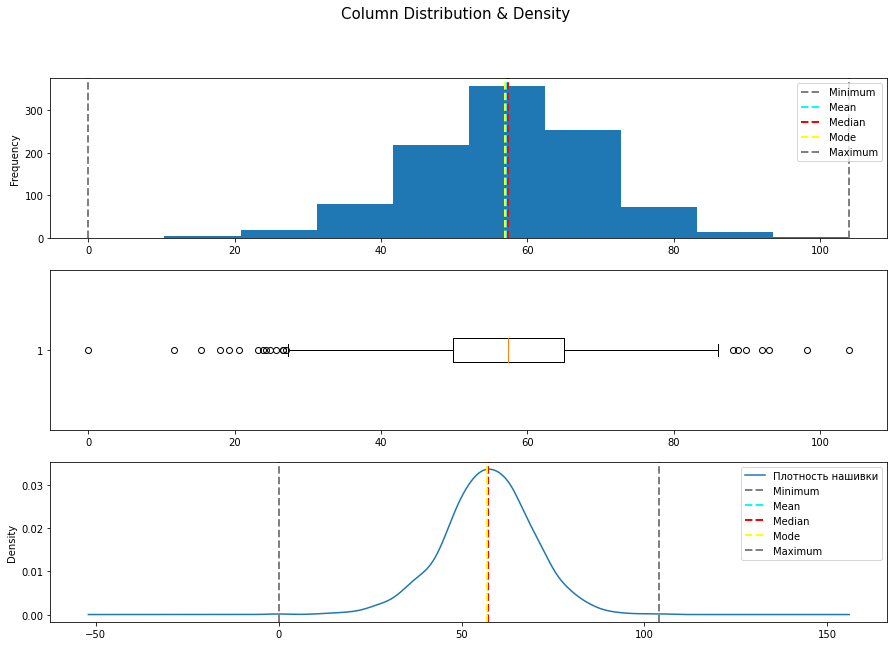

Num_Outliers: 21
Outliers    : [0.0, 11.7401256604075, 15.4160755126792, 17.9344081943835, 19.2505331367488, 20.5716333306441, 23.1434005604181, 23.8981957702763, 24.283522951107, 24.8605113249583, 25.6828562877684, 26.5598943659292, 26.6471544890232, 27.0193744351911, 88.0724895050505, 88.8076471500205, 89.8766155103646, 92.0421393826707, 92.9634919477473, 98.2026027528147, 103.988901301494]
Column:  Соотношение матрица-наполнитель
****************************************************************************************************
Missing values:  0
****************************************************************************************************
Missing values(%):  0.0
****************************************************************************************************
Unique values:  1014
****************************************************************************************************
Value counts: 
1.857143    4
3.532338    2
1.598174    2
2.877358    2
2.919678    2
          

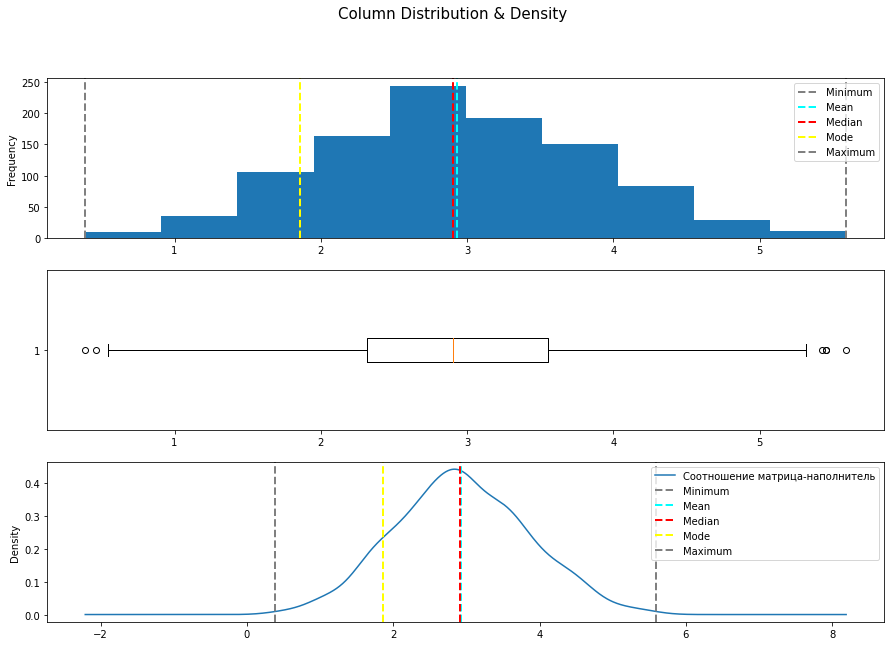

Num_Outliers: 6
Outliers    : [0.389402605178414, 0.463342035924085, 5.42513947440363, 5.45295943131032, 5.45556617827335, 5.59174159869754]
Column:  Плотность, кг/м3
****************************************************************************************************
Missing values:  0
****************************************************************************************************
Missing values(%):  0.0
****************************************************************************************************
Unique values:  1013
****************************************************************************************************
Value counts: 
2030.000000    6
2000.000000    2
1980.000000    2
1950.000000    2
1880.000000    2
              ..
1888.349132    1
1894.104387    1
2150.793053    1
1948.878616    1
1890.413468    1
Name: Плотность, кг/м3, Length: 1013, dtype: int64
****************************************************************************************************
Minimum:173

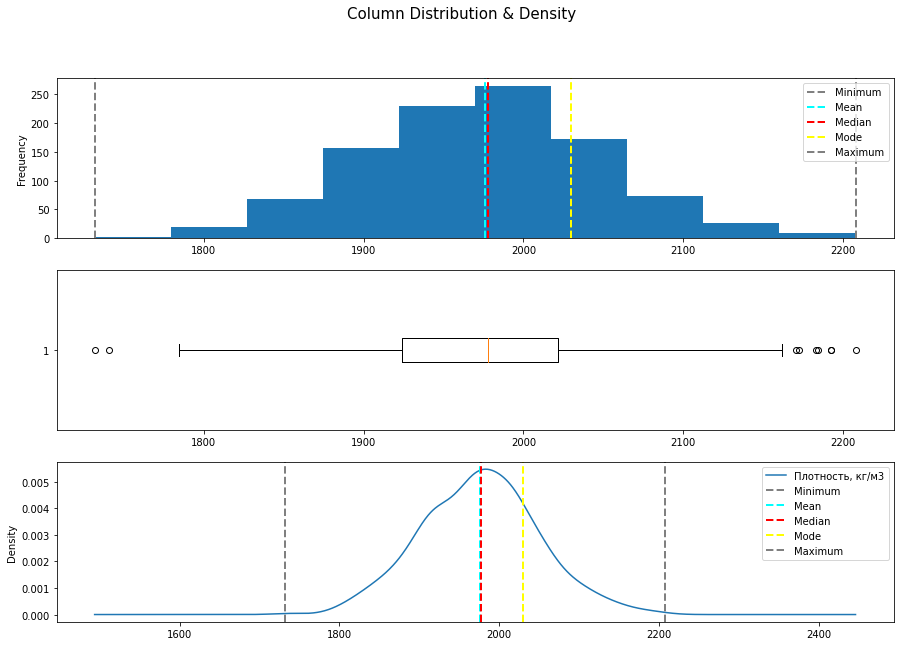

Num_Outliers: 9
Outliers    : [1731.764635096, 1740.65749569112, 2170.34236302043, 2172.24679646503, 2182.75182183283, 2184.49319952038, 2192.29763744164, 2192.73878348, 2207.77348061119]
Column:  модуль упругости, ГПа
****************************************************************************************************
Missing values:  0
****************************************************************************************************
Missing values(%):  0.0
****************************************************************************************************
Unique values:  1020
****************************************************************************************************
Value counts: 
738.736842    4
609.497976    1
593.264606    1
354.752402    1
694.430768    1
             ..
546.816051    1
730.830981    1
923.084499    1
891.784985    1
417.316232    1
Name: модуль упругости, ГПа, Length: 1020, dtype: int64
******************************************************************

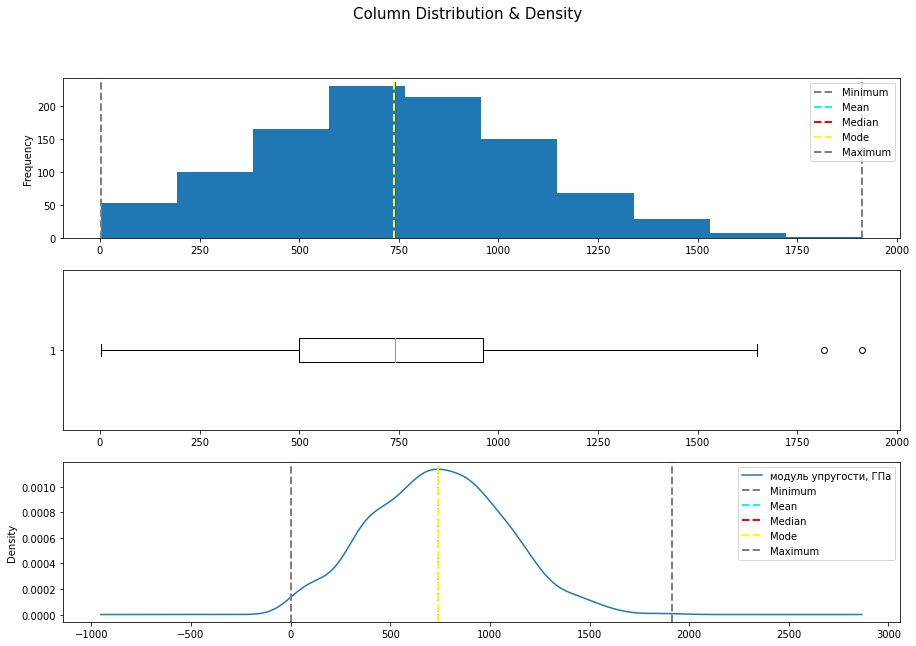

Num_Outliers: 2
Outliers    : [1815.86516990736, 1911.53647700054]
Column:  Количество отвердителя, м.%
****************************************************************************************************
Missing values:  0
****************************************************************************************************
Missing values(%):  0.0
****************************************************************************************************
Unique values:  1005
****************************************************************************************************
Value counts: 
129.000000    12
111.860000     8
30.000000      1
116.396208     1
137.983837     1
              ..
109.246571     1
62.743272      1
119.924425     1
122.273222     1
129.183416     1
Name: Количество отвердителя, м.%, Length: 1005, dtype: int64
****************************************************************************************************
Minimum:17.74
Mean:110.57
Median:110.56
Mode:129.00
Maximum:198

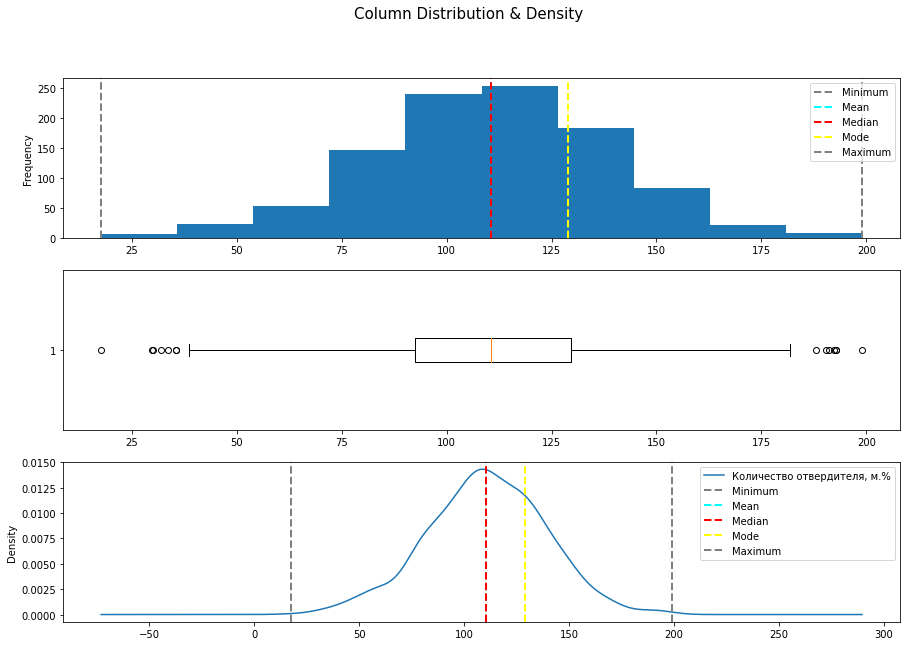

Num_Outliers: 14
Outliers    : [17.7402745562519, 29.9561496534826, 30.0, 32.0192215581845, 33.6241865036291, 35.599697406249, 35.6209043592388, 188.049897892565, 190.318107209251, 191.053003718703, 192.334469461448, 192.705385447053, 192.85170183308, 198.953207190451]
Column:  Содержание эпоксидных групп,%_2
****************************************************************************************************
Missing values:  0
****************************************************************************************************
Missing values(%):  0.0
****************************************************************************************************
Unique values:  1004
****************************************************************************************************
Value counts: 
21.250000    12
22.267857     9
25.576630     1
25.050848     1
23.276208     1
             ..
21.132573     1
23.961233     1
21.043501     1
20.646284     1
27.474763     1
Name: Содержание эпоксидных гр

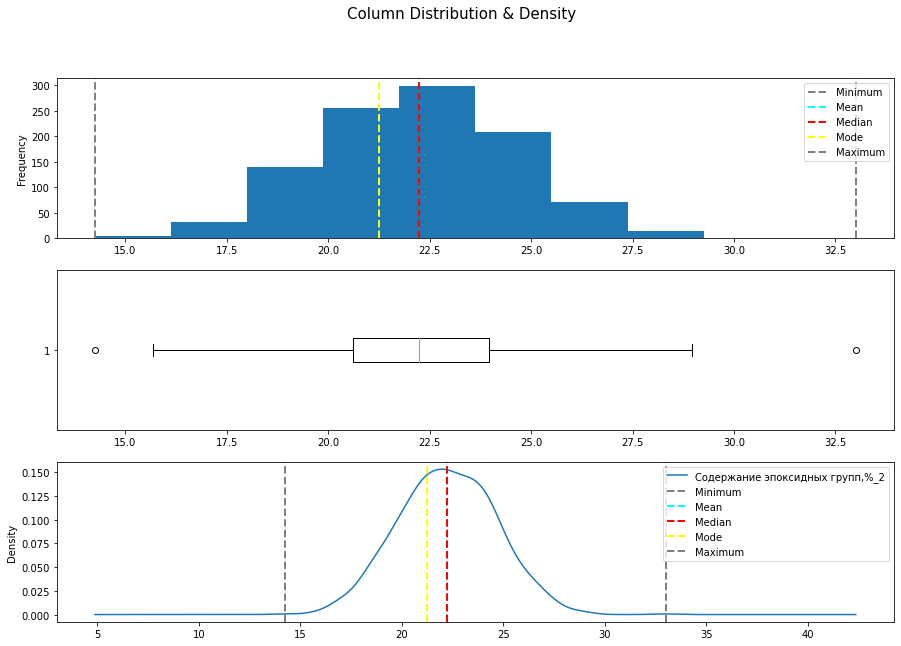

Num_Outliers: 2
Outliers    : [14.2549854977161, 33.0]
Column:  Температура вспышки, С_2
****************************************************************************************************
Missing values:  0
****************************************************************************************************
Missing values(%):  0.0
****************************************************************************************************
Unique values:  1003
****************************************************************************************************
Value counts: 
300.000000    12
284.615385    10
278.457686     1
382.759808     1
236.284743     1
              ..
248.849293     1
237.911236     1
364.872558     1
273.857159     1
300.952708     1
Name: Температура вспышки, С_2, Length: 1003, dtype: int64
****************************************************************************************************
Minimum:100.00
Mean:285.88
Median:285.90
Mode:300.00
Maximum:413.27



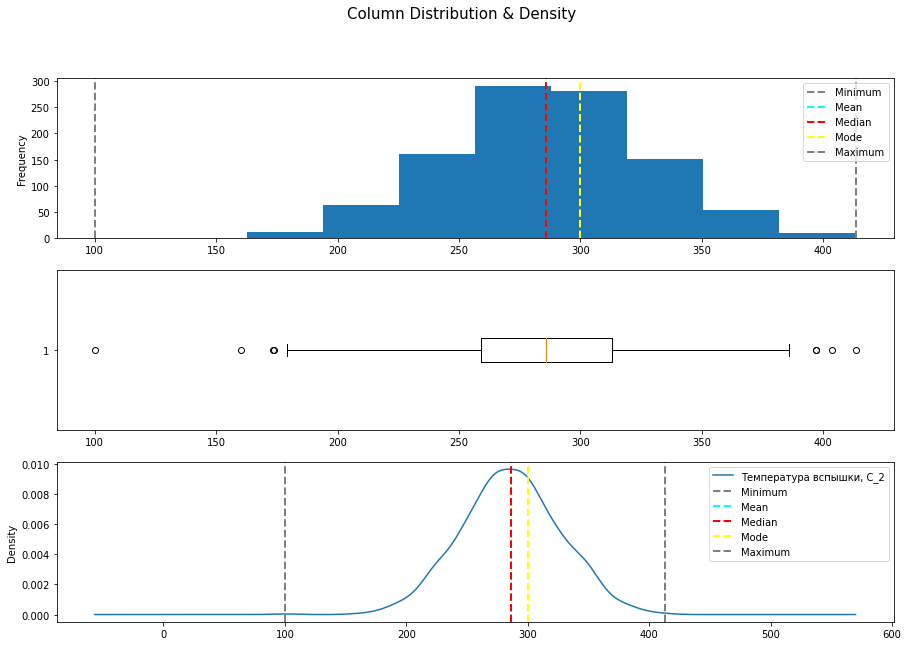

Num_Outliers: 8
Outliers    : [100.0, 160.255842892284, 173.484919924459, 173.973907031866, 396.898222222153, 397.151290856661, 403.652860876814, 413.273418243566]
Column:  Поверхностная плотность, г/м2
****************************************************************************************************
Missing values:  0
****************************************************************************************************
Missing values(%):  0.0
****************************************************************************************************
Unique values:  1004
****************************************************************************************************
Value counts: 
210.000000     9
470.000000     5
1010.000000    5
380.000000     4
641.468152     1
              ..
322.220632     1
223.049480     1
904.623338     1
39.819081      1
758.747882     1
Name: Поверхностная плотность, г/м2, Length: 1004, dtype: int64
***************************************************************

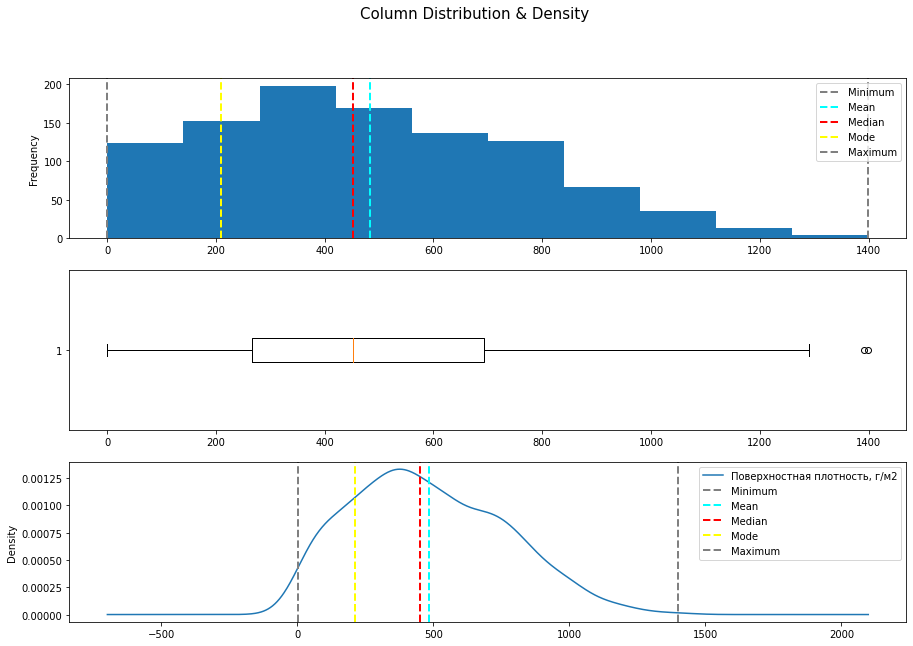

Num_Outliers: 2
Outliers    : [1391.03240865282, 1399.54236233989]
Column:  Модуль упругости при растяжении, ГПа
****************************************************************************************************
Missing values:  0
****************************************************************************************************
Missing values(%):  0.0
****************************************************************************************************
Unique values:  1004
****************************************************************************************************
Value counts: 
70.000000    9
73.333333    5
78.000000    5
75.000000    4
74.042708    1
            ..
71.758909    1
76.398875    1
66.522175    1
72.124020    1
74.309704    1
Name: Модуль упругости при растяжении, ГПа, Length: 1004, dtype: int64
****************************************************************************************************
Minimum:64.05
Mean:73.33
Median:73.27
Mode:70.00
Maximum:82.68



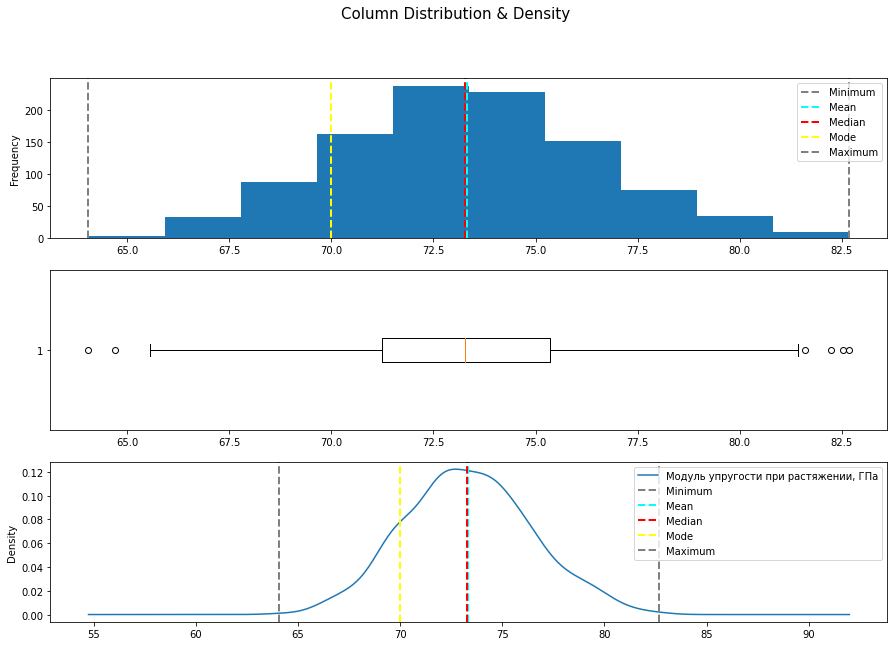

Num_Outliers: 6
Outliers    : [64.0540605597917, 64.6964003954224, 81.5947500139088, 82.2375998591107, 82.5257729935064, 82.682051035271]
Column:  Прочность при растяжении, МПа
****************************************************************************************************
Missing values:  0
****************************************************************************************************
Missing values(%):  0.0
****************************************************************************************************
Unique values:  1004
****************************************************************************************************
Value counts: 
3000.000000    9
2455.555556    5
2000.000000    5
1800.000000    4
2071.715856    1
              ..
2167.533030    1
2300.777919    1
2363.621230    1
2038.469587    1
2856.328932    1
Name: Прочность при растяжении, МПа, Length: 1004, dtype: int64
*****************************************************************************************

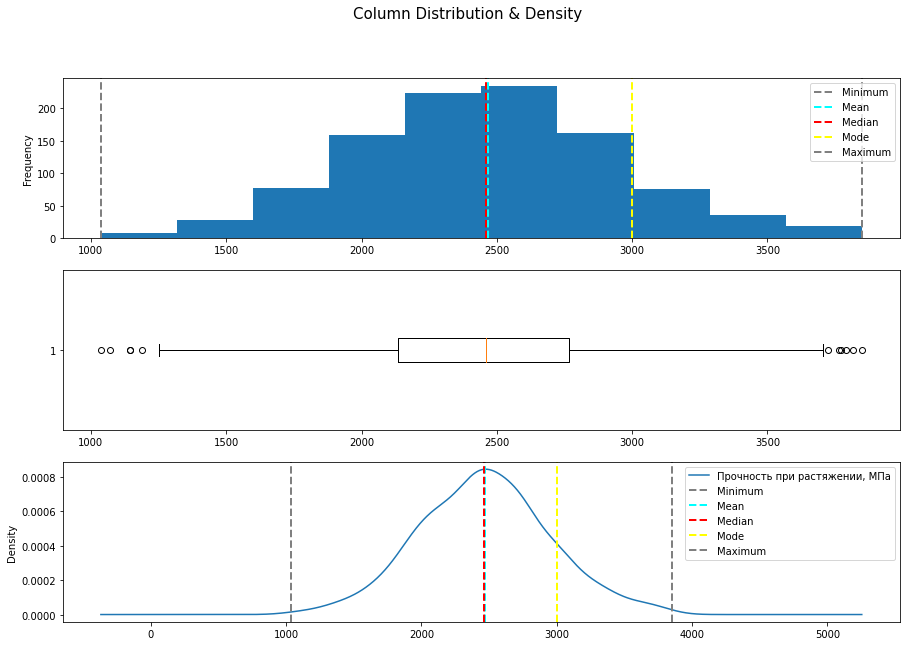

Num_Outliers: 11
Outliers    : [1036.85660535, 1071.12375147656, 1143.21033409802, 1145.06575740451, 1188.30741806356, 3725.19076007351, 3763.44517918687, 3773.15194881526, 3791.07281029286, 3817.26948410351, 3848.43673187618]
Column:  Потребление смолы, г/м2
****************************************************************************************************
Missing values:  0
****************************************************************************************************
Missing values(%):  0.0
****************************************************************************************************
Unique values:  1003
****************************************************************************************************
Value counts: 
220.000000    14
300.000000     5
120.000000     4
197.126067     1
226.994460     1
              ..
250.822178     1
242.416875     1
213.675599     1
212.307711     1
194.754342     1
Name: Потребление смолы, г/м2, Length: 1003, dtype: int64
************

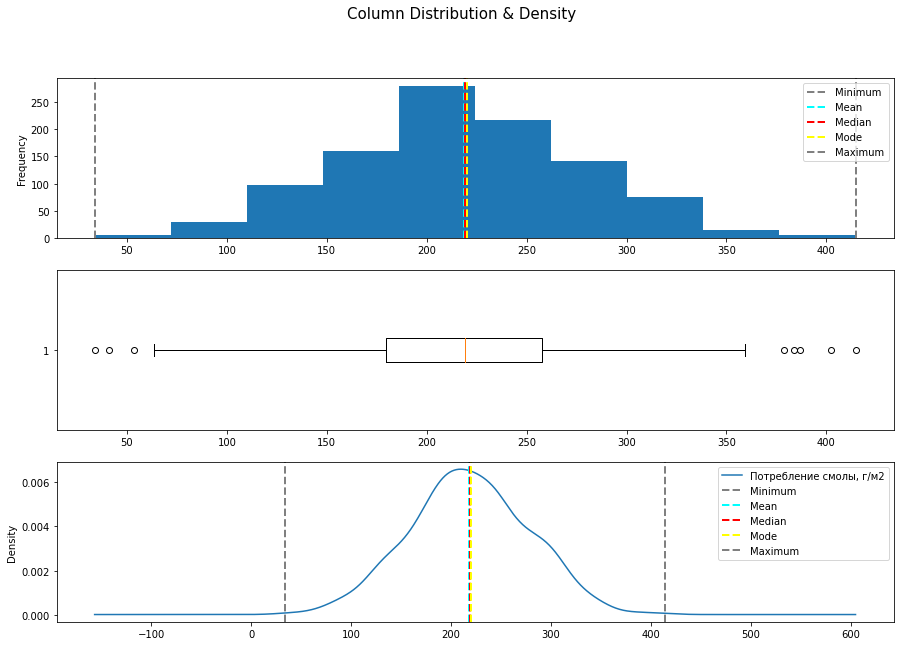

Num_Outliers: 8
Outliers    : [33.8030255329625, 41.0482779512307, 53.5489163606792, 378.756878829808, 383.663400548988, 386.903431430897, 402.163809219598, 414.590628361534]


In [106]:
summary('Угол нашивки, град')
show_distribution_density(df['Угол нашивки, град'])
outlier(df['Угол нашивки, град'])                  
summary('Шаг нашивки') 
show_distribution_density(df['Шаг нашивки'])   
outlier(df['Шаг нашивки'])                         
summary('Плотность нашивки')           
show_distribution_density(df['Плотность нашивки']) 
outlier(df['Плотность нашивки'])          
summary('Соотношение матрица-наполнитель')
show_distribution_density(df['Соотношение матрица-наполнитель'])   
outlier(df['Соотношение матрица-наполнитель'])      
summary('Плотность, кг/м3')            
show_distribution_density(df['Плотность, кг/м3'])  
outlier(df['Плотность, кг/м3'])        
summary('модуль упругости, ГПа')       
show_distribution_density(df['модуль упругости, ГПа']) 
outlier(df['модуль упругости, ГПа'])       
summary('Количество отвердителя, м.%') 
show_distribution_density(df['Количество отвердителя, м.%']) 
outlier(df['Количество отвердителя, м.%'])          
summary('Содержание эпоксидных групп,%_2')
show_distribution_density(df['Содержание эпоксидных групп,%_2']) 
outlier(df['Содержание эпоксидных групп,%_2'])       
summary('Температура вспышки, С_2')    
show_distribution_density(df['Температура вспышки, С_2'])   
outlier(df['Температура вспышки, С_2'])        
summary('Поверхностная плотность, г/м2')
show_distribution_density(df['Поверхностная плотность, г/м2'])   
outlier(df['Поверхностная плотность, г/м2'])       
summary('Модуль упругости при растяжении, ГПа')
show_distribution_density(df['Модуль упругости при растяжении, ГПа'])   
outlier(df['Модуль упругости при растяжении, ГПа']) 
summary('Прочность при растяжении, МПа')
show_distribution_density(df['Прочность при растяжении, МПа'])   
outlier(df['Прочность при растяжении, МПа'])        
summary('Потребление смолы, г/м2')  
show_distribution_density(df['Потребление смолы, г/м2'])
outlier(df['Потребление смолы, г/м2'])

2.4.3 HistPlot и Probability Plot(квантиль-квантиль)

In [107]:
#HistPlot и Probability Plot(квантиль-квантиль)

def check_dist(df, var):
    plt.figure(figsize=(10,4))
    plt.subplot(1, 2, 1)
    sns.histplot(x=var, data=df)
    plt.subplot(1, 2, 2)
    stats.probplot(df[var], dist="norm", plot=plt)
    plt.show()

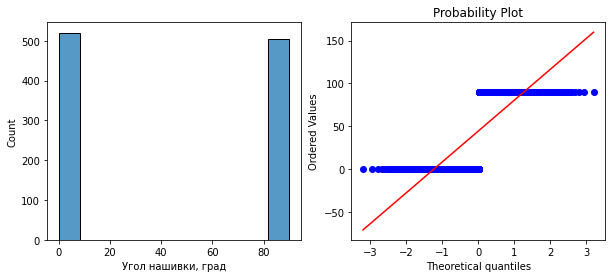

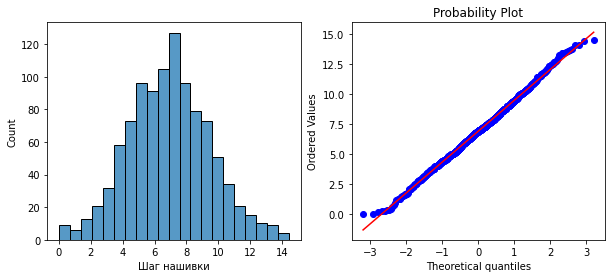

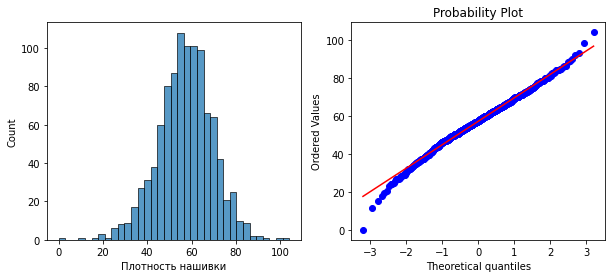

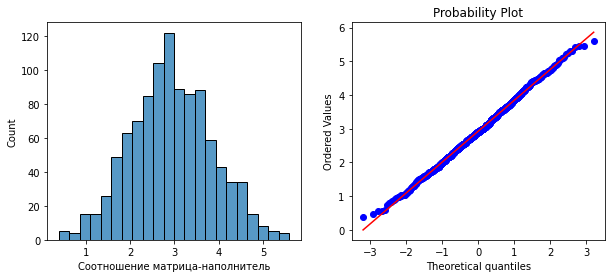

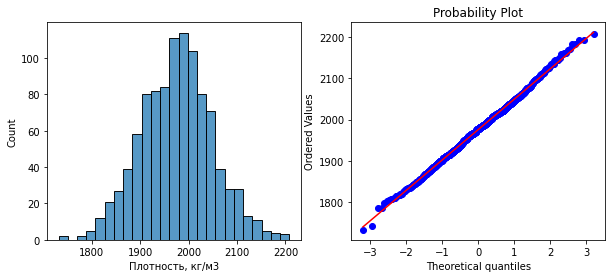

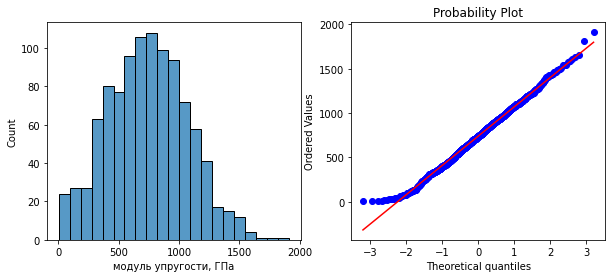

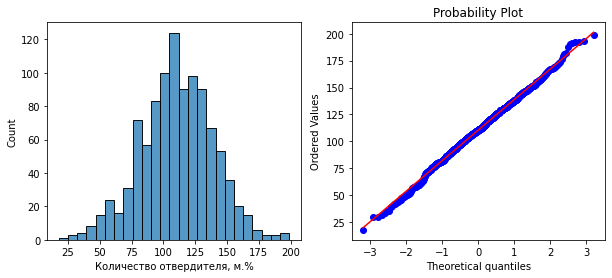

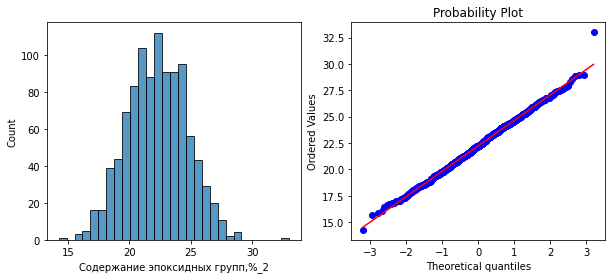

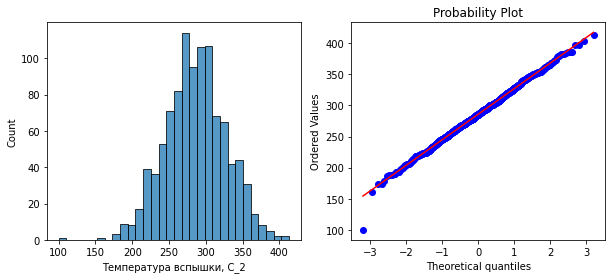

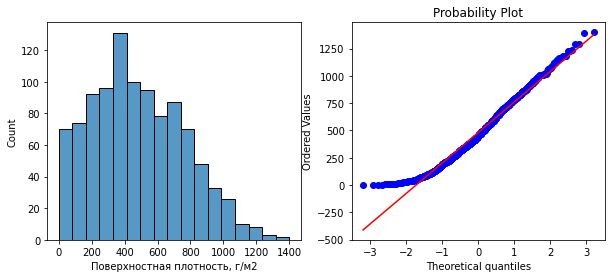

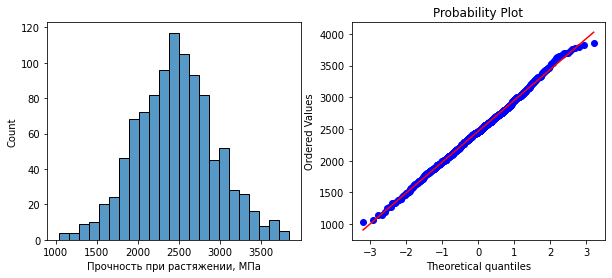

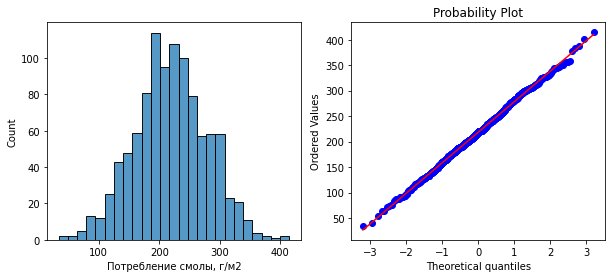

In [108]:
#target1=Модуль упругости при растяжении, ГПа
#убираем только один таргет,т.к. для других ничего не измениться по иксам
for col in df.drop("Модуль упругости при растяжении, ГПа", axis=1).columns:
    check_dist(df, col)

2.4.4 Scatter plot - Точечная диаграмма отношения между двумя непрерывными переменными

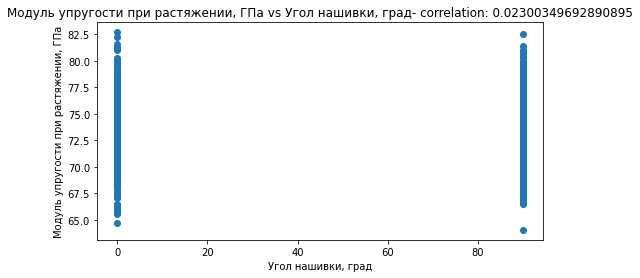

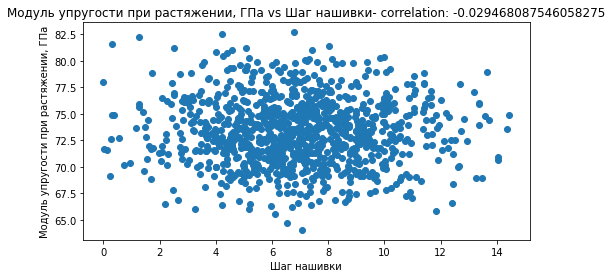

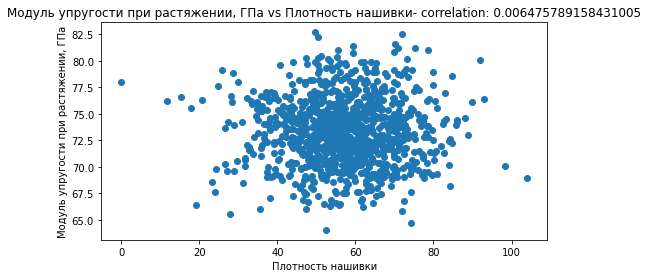

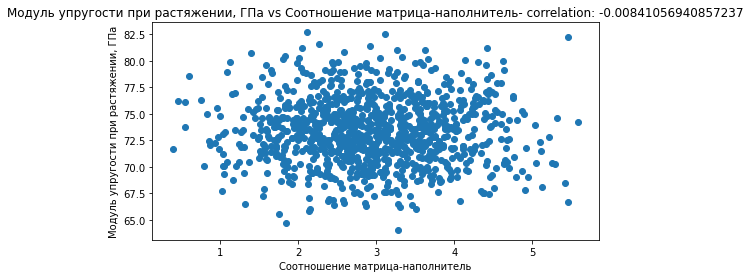

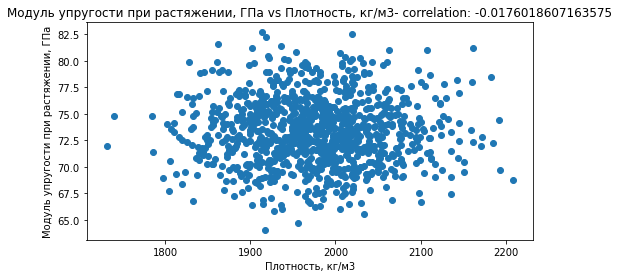

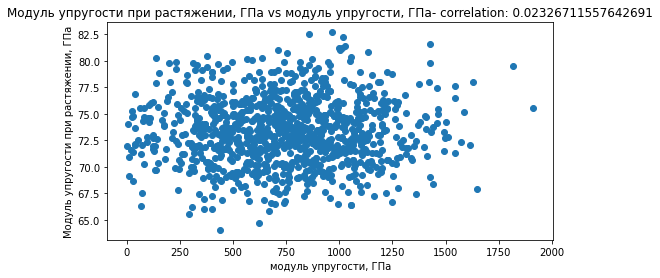

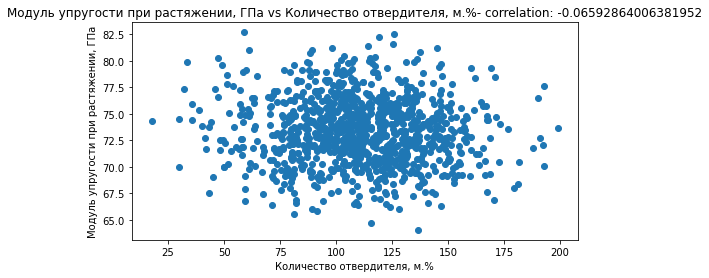

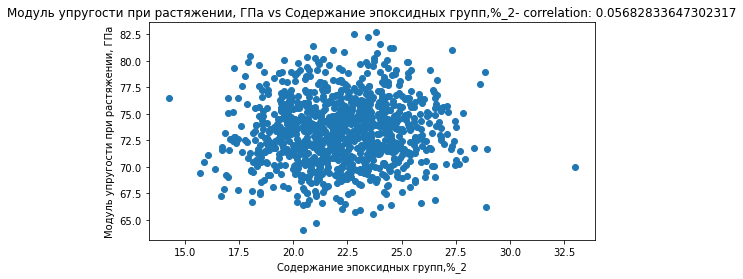

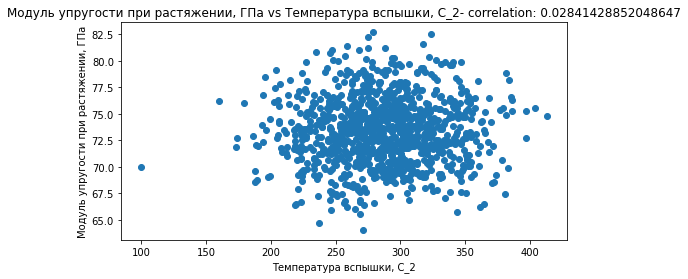

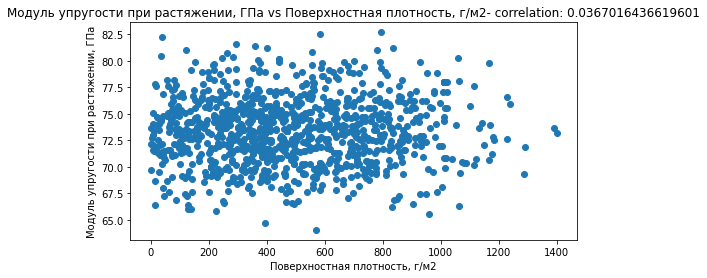

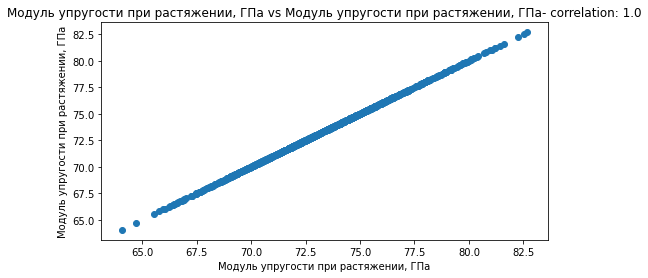

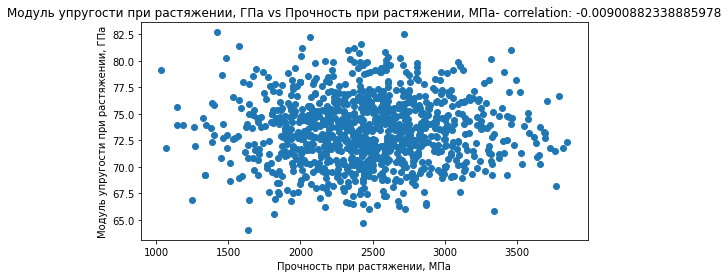

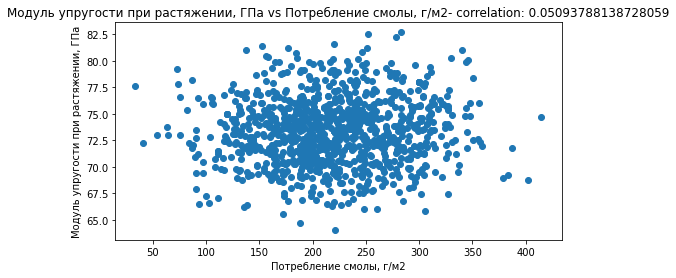

In [109]:
#scatter plot 1


for col in df.columns:
    fig = plt.figure(figsize=(8, 4))
    ax = fig.gca()
    feature = df[col]
    label = df['Модуль упругости при растяжении, ГПа']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Модуль упругости при растяжении, ГПа')
    ax.set_title('Модуль упругости при растяжении, ГПа vs ' + col + '- correlation: ' + str(correlation))
plt.show()



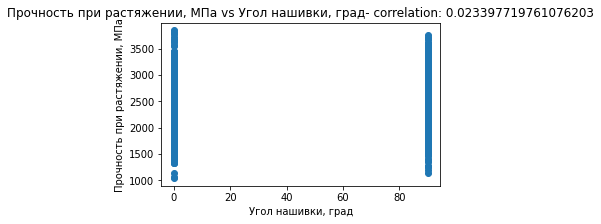

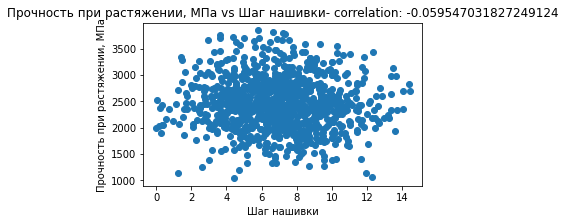

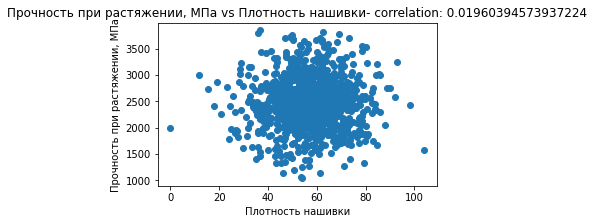

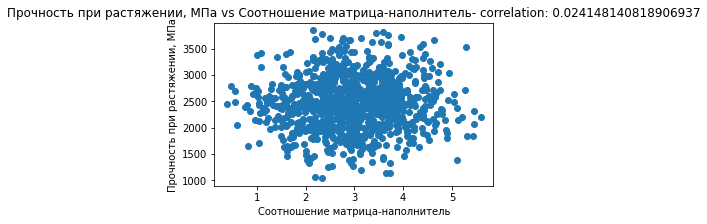

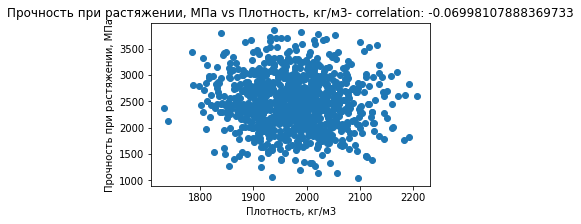

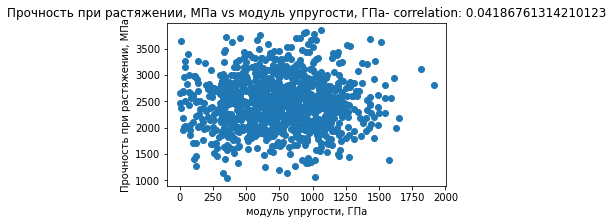

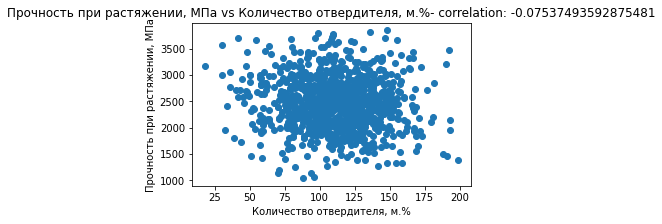

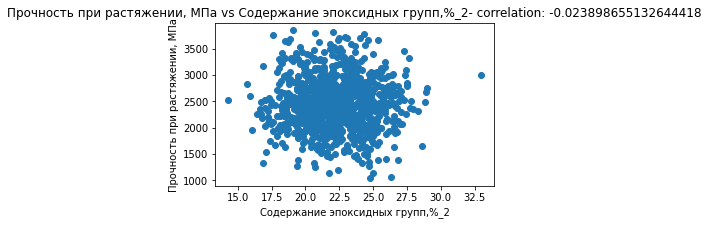

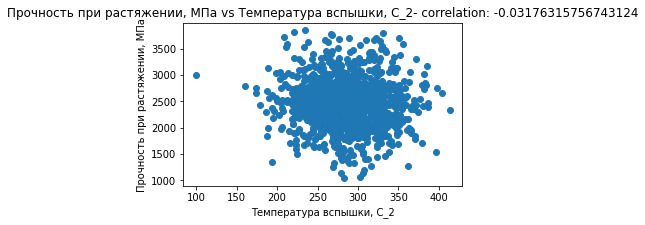

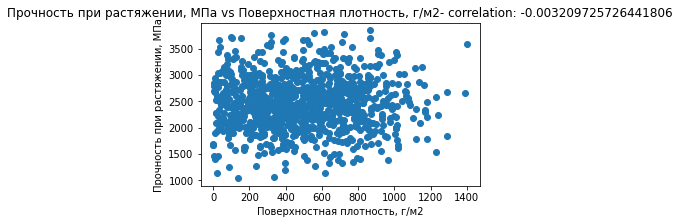

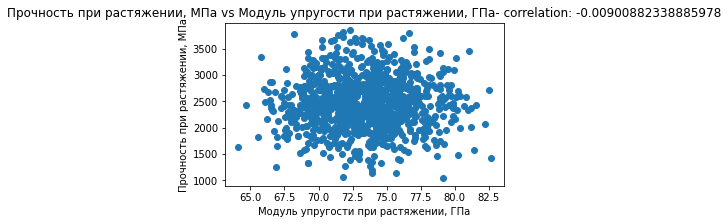

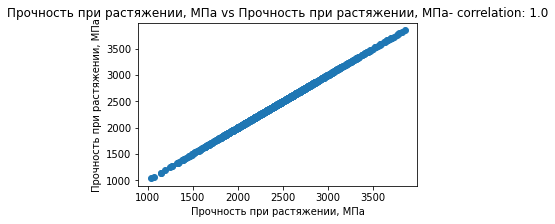

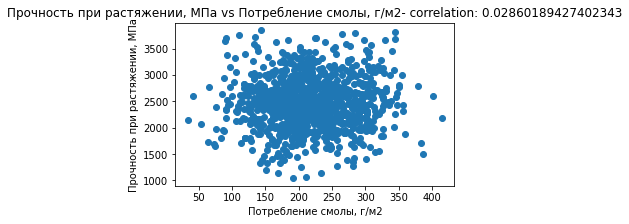

In [110]:
#scatter plot 2


for col in df.columns:
    fig = plt.figure(figsize=(5, 3))
    ax = fig.gca()
    feature = df[col]
    label = df['Прочность при растяжении, МПа']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Прочность при растяжении, МПа')
    ax.set_title('Прочность при растяжении, МПа vs ' + col + '- correlation: ' + str(correlation))
plt.show()

2.4.5 Pairplot - попарная взаимосвязь между всеми данными

In [111]:
#pairplot

sns.pairplot(df);

Output hidden; open in https://colab.research.google.com to view.

2.4.6 Корреляция

In [112]:
#Correlation

target1 = 'Модуль упругости при растяжении, ГПа'
target2 = 'Прочность при растяжении, МПа'
target3 = 'Соотношение матрица-наполнитель'

#target1

corr_by_target1 = df.corr()[target1].sort_values()
corr_by_target1


Количество отвердителя, м.%            -0.065929
Шаг нашивки                            -0.029468
Плотность, кг/м3                       -0.017602
Прочность при растяжении, МПа          -0.009009
Соотношение матрица-наполнитель        -0.008411
Плотность нашивки                       0.006476
Угол нашивки, град                      0.023003
модуль упругости, ГПа                   0.023267
Температура вспышки, С_2                0.028414
Поверхностная плотность, г/м2           0.036702
Потребление смолы, г/м2                 0.050938
Содержание эпоксидных групп,%_2         0.056828
Модуль упругости при растяжении, ГПа    1.000000
Name: Модуль упругости при растяжении, ГПа, dtype: float64

In [113]:
#target2

corr_by_target2 = df.corr()[target2].sort_values()
corr_by_target2



Количество отвердителя, м.%            -0.075375
Плотность, кг/м3                       -0.069981
Шаг нашивки                            -0.059547
Температура вспышки, С_2               -0.031763
Содержание эпоксидных групп,%_2        -0.023899
Модуль упругости при растяжении, ГПа   -0.009009
Поверхностная плотность, г/м2          -0.003210
Плотность нашивки                       0.019604
Угол нашивки, град                      0.023398
Соотношение матрица-наполнитель         0.024148
Потребление смолы, г/м2                 0.028602
модуль упругости, ГПа                   0.041868
Прочность при растяжении, МПа           1.000000
Name: Прочность при растяжении, МПа, dtype: float64

In [114]:
#traget3

corr_by_target3 = df.corr()[target3].sort_values()
corr_by_target3

Угол нашивки, град                     -0.031073
Модуль упругости при растяжении, ГПа   -0.008411
Количество отвердителя, м.%            -0.006445
Поверхностная плотность, г/м2          -0.006272
Температура вспышки, С_2               -0.004776
Плотность нашивки                      -0.004652
Плотность, кг/м3                        0.003841
Содержание эпоксидных групп,%_2         0.019766
Прочность при растяжении, МПа           0.024148
модуль упругости, ГПа                   0.031700
Шаг нашивки                             0.036437
Потребление смолы, г/м2                 0.072531
Соотношение матрица-наполнитель         1.000000
Name: Соотношение матрица-наполнитель, dtype: float64

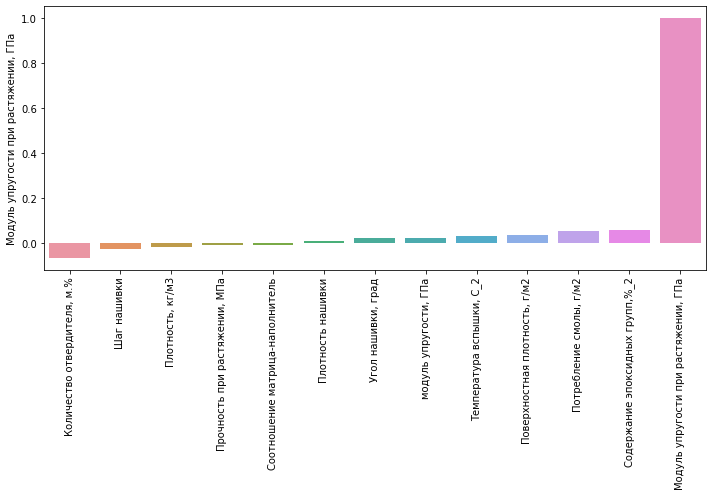

In [115]:
plt.figure(figsize = (10,7))
sns.barplot(x = corr_by_target1.index, y = corr_by_target1)
plt.xticks(rotation=90)
plt.tight_layout();

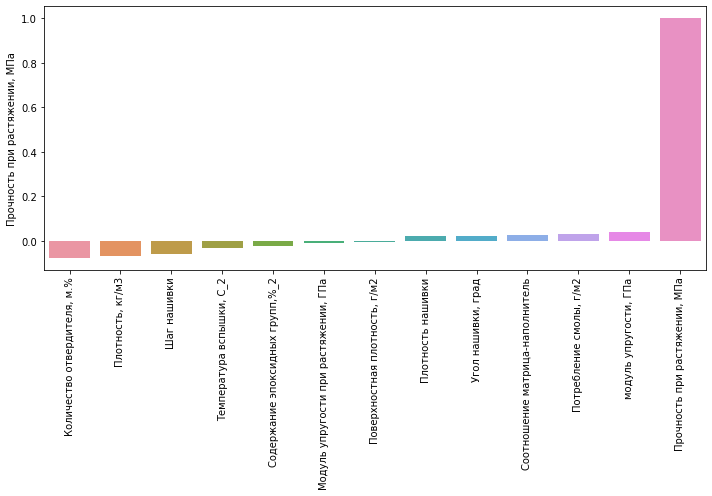

In [116]:
plt.figure(figsize = (10,7))
sns.barplot(x = corr_by_target2.index, y = corr_by_target2)
plt.xticks(rotation=90)
plt.tight_layout();

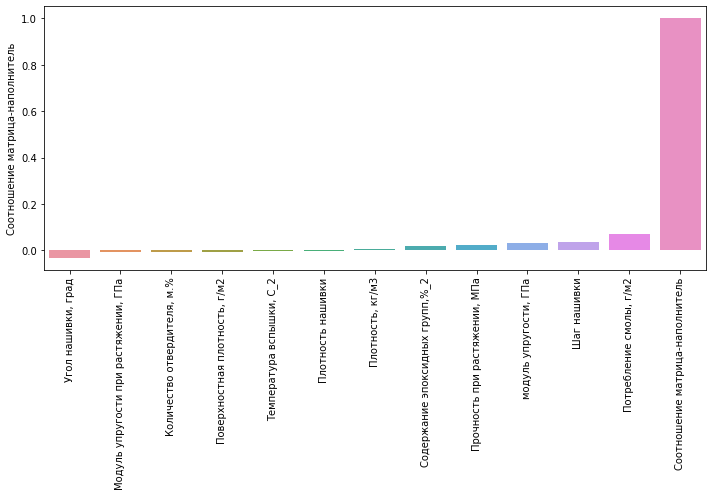

In [117]:
plt.figure(figsize = (10,7))
sns.barplot(x = corr_by_target3.index, y = corr_by_target3)
plt.xticks(rotation=90)
plt.tight_layout();

2.4.7 Мультиколлинеарность 

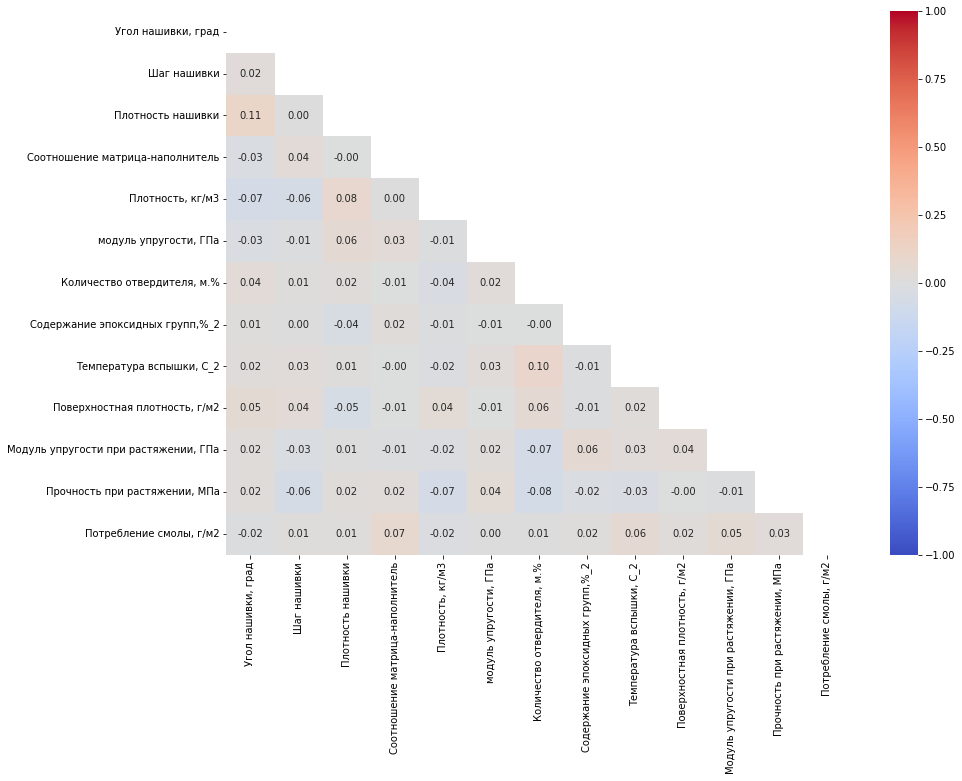

In [118]:
#Мультиколлинеарность 

matrix = np.triu(df.corr())
fig, ax = plt.subplots(figsize=(14,10)) 
sns.heatmap (df.corr(), annot=True, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap='coolwarm',mask=matrix, ax=ax);



In [119]:
def multicolinearity_control(df):                    
    df_temp = df.corr()
    count = 'Done'
    feature =[]
    collinear= []
    for col in df_temp.columns:
        for i in df_temp.index:
            if abs(df_temp[col][i] > .65 and df_temp[col][i] < 1):
                    feature.append(col)
                    collinear.append(i)
                    cprint(f"Multicolinearity alert in between --> {col} - {i} --> {round(df_temp[col][i], 6)}", "red", attrs=["bold"])
    else:
        cprint(f"мультиколлинеарность не вызывает проблем.", "blue", attrs=["bold"])
        pass

In [120]:
multicolinearity_control(df)

мультиколлинеарность не вызывает проблем.


2.4.8 Ассиметрия

In [121]:
#ассиметрия

skew_limit = 0.5
skew_vals = df.skew()
skew_cols = skew_vals[abs(skew_vals)> skew_limit].sort_values(ascending=False)
skew_cols 

Series([], dtype: float64)

2.4.9 Выбросы

In [122]:
# Вычисляем квартили и межквартильный диапазон для всех столбцов
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

# Вычисляем нижнюю и верхнюю границы для всех столбцов
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

# Находим выбросы для всех столбцов
outliers = (df < lower_bound) | (df > upper_bound)

# Считаем кол-во выбросов в каждом столбце
outliers_count = outliers.sum()
print(outliers_count)

Угол нашивки, град                       0
Шаг нашивки                              4
Плотность нашивки                       21
Соотношение матрица-наполнитель          6
Плотность, кг/м3                         9
модуль упругости, ГПа                    2
Количество отвердителя, м.%             14
Содержание эпоксидных групп,%_2          2
Температура вспышки, С_2                 8
Поверхностная плотность, г/м2            2
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           11
Потребление смолы, г/м2                  8
dtype: int64


In [123]:
#удаляем выбросы 
df = df[~outliers.any(axis=1)]



In [124]:
#проверка
# Вычисляем квартили и межквартильный диапазон для всех столбцов
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

# Вычисляем нижнюю и верхнюю границы для всех столбцов
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

# Находим выбросы для всех столбцов
outliers = (df < lower_bound) | (df > upper_bound)

# Считаем кол-во выбросов в каждом столбце
outliers_count = outliers.sum()
print(outliers_count)


Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       3
Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   1
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    1
Прочность при растяжении, МПа           4
Потребление смолы, г/м2                 1
dtype: int64


In [125]:
#удаляем выбросы 2
df = df[~outliers.any(axis=1)]


In [126]:
#проверка 2
# Вычисляем квартили и межквартильный диапазон для всех столбцов
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

# Вычисляем нижнюю и верхнюю границы для всех столбцов
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

# Находим выбросы для всех столбцов
outliers = (df < lower_bound) | (df > upper_bound)

# Считаем кол-во выбросов в каждом столбце
outliers_count = outliers.sum()
print(outliers_count)

Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       1
Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           2
Потребление смолы, г/м2                 1
dtype: int64


In [127]:
#удаляем выбросы 3
df = df[~outliers.any(axis=1)]

In [128]:
#проверка 3
# Вычисляем квартили и межквартильный диапазон для всех столбцов
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

# Вычисляем нижнюю и верхнюю границы для всех столбцов
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

# Находим выбросы для всех столбцов
outliers = (df < lower_bound) | (df > upper_bound)

# Считаем кол-во выбросов в каждом столбце
outliers_count = outliers.sum()
print(outliers_count)

Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
dtype: int64


In [129]:
df.shape

(922, 13)

2.4.10 Плотность ядра

KDE - это метод сглаживания гистограммы, который строит гладкую оценку плотности вероятности данных. Он помогает понять форму распределения данных и выявить возможные пики или скопления значений. Визуализация KDE часто используется в EDA для изучения данных и определения наиболее значимых факторов. 

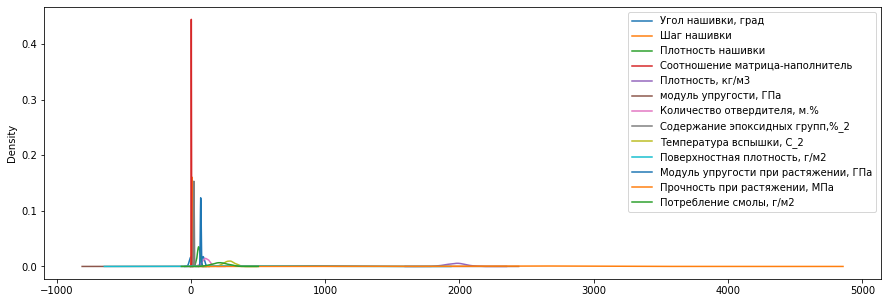

In [130]:
def plt_kde(df):
  fig, ax = plt.subplots(figsize=(15, 5))
  df.plot(kind='kde', ax=ax)
plt_kde(df)

**3.Препроцессинг данных (preprocessing)**

3.1 Нормализация

In [131]:
#Метод MinMaxScaler приводит значения в каждом столбце к диапазону от 0 до 1
scaler = preprocessing.MinMaxScaler()
columns = df.columns
df_n = scaler.fit_transform(np.array(df))
df_n = pd.DataFrame(df_n, columns=columns)
df_n.head()

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,0.0,0.289334,0.546433,0.274768,0.651097,0.452951,0.079153,0.607435,0.509164,0.16223,0.272962,0.727777,0.514688
1,0.0,0.362355,0.319758,0.274768,0.651097,0.452951,0.630983,0.418887,0.583596,0.16223,0.272962,0.727777,0.514688
2,0.0,0.362355,0.494123,0.466552,0.651097,0.461725,0.511257,0.495653,0.509164,0.16223,0.272962,0.727777,0.514688
3,0.0,0.362355,0.546433,0.465836,0.571539,0.458649,0.511257,0.495653,0.509164,0.16223,0.272962,0.727777,0.514688
4,0.0,0.362355,0.720799,0.424236,0.332865,0.494944,0.511257,0.495653,0.509164,0.16223,0.272962,0.727777,0.514688


In [132]:
scaler.inverse_transform(np.array(df_n)[:1,:])

array([[0.00000000e+00, 4.00000000e+00, 6.00000000e+01, 1.85714286e+00,
        2.03000000e+03, 7.38736842e+02, 5.00000000e+01, 2.37500000e+01,
        2.84615385e+02, 2.10000000e+02, 7.00000000e+01, 3.00000000e+03,
        2.20000000e+02]])

In [133]:
#переменновые и целевые показатели
#разделение данных
X_1 = df.drop(['Модуль упругости при растяжении, ГПа'], axis=1)
X_2 = df.drop(['Прочность при растяжении, МПа'], axis=1)
y_1 = df[['Модуль упругости при растяжении, ГПа']]
y_2 = df[['Прочность при растяжении, МПа']]

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.3, random_state=42)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=42)

In [134]:
print ('Training Set_1: %d rows\nTest Set_1    : %d rows' % (X_train_1.shape[0], X_test_1.shape[0]))

Training Set_1: 645 rows
Test Set_1    : 277 rows


In [135]:
print ('Training Set_2: %d rows\nTest Set_2    : %d rows' % (X_train_2.shape[0], X_test_2.shape[0]))

Training Set_2: 645 rows
Test Set_2    : 277 rows


In [136]:
#Масштабирование (scaling) используется в машинном обучении для приведения значений разных признаков к одному диапазону, чтобы они могли быть обработаны моделями машинного обучения более эффективно. 


from sklearn.preprocessing import StandardScaler, RobustScaler



In [137]:
for col in df.columns:
    print(f'{col} range :', round(np.min(df[col]),2), "-", round(np.max(df[col]),2))

Угол нашивки, град range : 0 - 90
Шаг нашивки range : 0.04 - 13.73
Плотность нашивки range : 28.66 - 86.01
Соотношение матрица-наполнитель range : 0.55 - 5.31
Плотность, кг/м3 range : 1784.48 - 2161.57
модуль упругости, ГПа range : 2.44 - 1628.0
Количество отвердителя, м.% range : 38.67 - 181.83
Содержание эпоксидных групп,%_2 range : 15.7 - 28.96
Температура вспышки, С_2 range : 179.37 - 386.07
Поверхностная плотность, г/м2 range : 0.6 - 1291.34
Модуль упругости при растяжении, ГПа range : 65.79 - 81.2
Прочность при растяжении, МПа range : 1250.39 - 3654.43
Потребление смолы, г/м2 range : 72.53 - 359.05


In [138]:
scaler = StandardScaler()
scaler.fit(X_train_1)
X_train_1_scaled = scaler.transform(X_train_1) 
X_test_1_scaled = scaler.transform(X_test_1)

In [139]:
X_train_1_scaled[1]

array([ 0.94125709, -0.99032992,  0.14065095, -1.6909806 ,  0.4431894 ,
        0.02075822, -0.86288133,  0.71293932, -1.00624894, -0.77275816,
       -0.12548262, -0.54477954])

In [140]:
X_test_1_scaled[1]

array([-1.06240899,  0.19480327,  1.02835441,  1.27004122,  0.36865065,
        0.00860509,  0.74718834,  0.00686679, -0.03154612, -1.46290406,
        0.54619852,  0.13478384])

In [141]:
y_test_1.shape

(277, 1)

In [142]:
scaler = StandardScaler()
scaler.fit(X_train_2)
X_train_2_scaled = scaler.transform(X_train_2) 
X_test_2_scaled = scaler.transform(X_test_2)

In [143]:
X_train_2_scaled[1]

array([ 0.94125709, -0.99032992,  0.14065095, -1.6909806 ,  0.4431894 ,
        0.02075822, -0.86288133,  0.71293932, -1.00624894, -0.77275816,
        2.5218094 , -0.54477954])

In [144]:
X_test_2_scaled[1]

array([-1.06240899,  0.19480327,  1.02835441,  1.27004122,  0.36865065,
        0.00860509,  0.74718834,  0.00686679, -0.03154612, -1.46290406,
        1.3572643 ,  0.13478384])

In [145]:
def train_val_1(y_train_1, y_train_1_pred, y_test_1, y_pred_1, model_name):
    
    scores = {model_name+"_train": {"R2" : r2_score(y_train_1, y_train_1_pred),
    "mae" : mean_absolute_error(y_train_1, y_train_1_pred),
    "mse" : mean_squared_error(y_train_1, y_train_1_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train_1, y_train_1_pred))},
    
    model_name+"_test": {"R2" : r2_score(y_test_1, y_pred_1),
    "mae" : mean_absolute_error(y_test_1, y_pred_1),
    "mse" : mean_squared_error(y_test_1, y_pred_1),
    "rmse" : np.sqrt(mean_squared_error(y_test_1, y_pred_1))}}
    
    return pd.DataFrame(scores)

In [146]:
type(y_test_1)

pandas.core.frame.DataFrame

In [147]:
#type(y_pred_1)

In [148]:
def train_val_2(y_train_2, y_train_2_pred, y_test_2, y_pred_2, model_name):
    
    scores = {model_name+"_train": {"R2" : r2_score(y_train_2, y_train_2_pred),
    "mae" : mean_absolute_error(y_train_2, y_train_2_pred),
    "mse" : mean_squared_error(y_train_2, y_train_2_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train_2, y_train_2_pred))},
    
    model_name+"_test": {"R2" : r2_score(y_test_2, y_pred_2),
    "mae" : mean_absolute_error(y_test_2, y_pred_2),
    "mse" : mean_squared_error(y_test_2, y_pred_2),
    "rmse" : np.sqrt(mean_squared_error(y_test_2, y_pred_2))}}
    
    return pd.DataFrame(scores)



**4. Построение моделей** 

4.1 Линейная регрессия (Linear model)

LinearRegression() 

      linear_train  linear_test
R2        0.017761    -0.026243
mae       2.377611     2.612192
mse       8.635060    10.170441
rmse      2.938547     3.189113


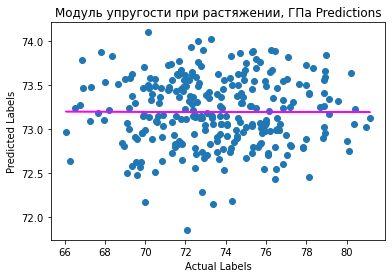

In [149]:
#линейная регрессия 1 - Модуль упругости при растяжении

# Fit Linear model on the training set. The model is trained on x_train and y_train.
linear = LinearRegression().fit(X_train_1_scaled, y_train_1)
print (linear, "\n")

# Evaluate the model using the test data. The trained model is run on X_test and metrics are retrieved.
y_pred_1 = linear.predict(X_test_1_scaled)
y_train_1_pred = linear.predict(X_train_1_scaled)
ls =train_val_1(y_train_1, y_train_1_pred, y_test_1, y_pred_1, "linear")
print(ls)

# Plot predicted vs actual
plt.scatter(y_test_1, y_pred_1)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Модуль упругости при растяжении, ГПа Predictions')

# Overlay the regression line
z = np.polyfit(y_test_1.to_numpy().ravel(), pd.DataFrame(y_pred_1).values.ravel(), 1)
p = np.poly1d(z)
plt.plot(y_test_1,p(y_test_1), color='magenta')
plt.show()

y_pred_1 = linear.predict(X_test_1_scaled)
linear_R2 = r2_score(y_test_1, y_pred_1)
linear_mae = mean_absolute_error(y_test_1, y_pred_1)
linear_mse = mean_squared_error(y_test_1, y_pred_1)
linear_rmse = np.sqrt(mean_squared_error(y_test_1, y_pred_1))


LinearRegression() 

       linear_train    linear_test
R2         0.017607      -0.005456
mae      355.297289     373.084567
mse   198269.425287  215214.232017
rmse     445.274550     463.911880


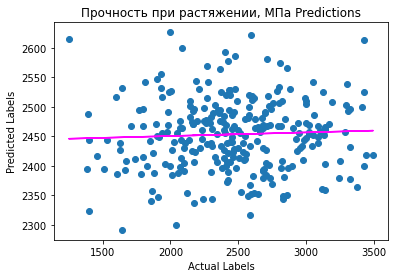

In [150]:
#линейная регрессия 2 -	Прочность при растяжении, МПа

# Fit Linear model on the training set. The model is trained on x_train and y_train.
linear = LinearRegression().fit(X_train_2_scaled, y_train_2)
print (linear, "\n")

# Evaluate the model using the test data. The trained model is run on X_test and metrics are retrieved.
y_pred_2 = linear.predict(X_test_2_scaled)
y_train_2_pred = linear.predict(X_train_2_scaled)
ls =train_val_2(y_train_2, y_train_2_pred, y_test_2, y_pred_2, "linear")
print(ls)

# Plot predicted vs actual
plt.scatter(y_test_2, y_pred_2)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Прочность при растяжении, МПа Predictions')

# Overlay the regression line
z = np.polyfit(y_test_2.to_numpy().ravel(), pd.DataFrame(y_pred_2).values.ravel(), 1)
p = np.poly1d(z)
plt.plot(y_test_2,p(y_test_2), color='magenta')
plt.show()

y_pred_2 = linear.predict(X_test_2_scaled)
linear_R2 = r2_score(y_test_2, y_pred_2)
linear_mae = mean_absolute_error(y_test_2, y_pred_2)
linear_mse = mean_squared_error(y_test_2, y_pred_2)
linear_rmse = np.sqrt(mean_squared_error(y_test_2, y_pred_2))

In [151]:
def adj_r2(y_test_1, y_pred_1, X_1):
    r2 = r2_score(y_test_1, y_pred_1)
    n = X_1.shape[0]   # number of observations
    p = X_1.shape[1]   # number of independent variables 
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [152]:
adj_r2(y_test_1, y_pred_1, X_1)



-0.03979100478343911

In [153]:
def adj_r2(y_test_2, y_pred_2, X_2):
    r2 = r2_score(y_test_2, y_pred_2)
    n = X_2.shape[0]   # number of observations
    p = X_2.shape[1]   # number of independent variables 
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [154]:
adj_r2(y_test_2, y_pred_2, X_2)

-0.018729438587996805

**4.2 Метод К ближайших соседей**

In [155]:
#Метод К ближайших соседей

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Для Модуля упругости при растяжении
# Обучение модели на тренировочных данных
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_1, y_train_1)

# Прогнозирование значений на тестовых данных
y_pred_1 = knn.predict(X_test_1)

# Оценка качества модели
mse = mean_squared_error(y_test_1, y_pred_1)
mae = mean_absolute_error(y_test_1, y_pred_1)
r2 = r2_score(y_test_1, y_pred_1)

print('MSE:', mse)
print('MAE:', mae)
print('R2:', r2)

MSE: 11.271439323455306
MAE: 2.7301431264401055
R2: -0.13733895432943943


In [156]:
#Для прочности при растяжении
# Обучение модели на тренировочных данных 

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_2, y_train_2)

# Прогнозирование значений на тестовых данных
y_pred_2 = knn.predict(X_test_2)

# Оценка качества модели
mse = mean_squared_error(y_test_2, y_pred_2)
mae = mean_absolute_error(y_test_2, y_pred_2)
r2 = r2_score(y_test_2, y_pred_2)

print('MSE:', mse)
print('MAE:', mae)
print('R2:', r2)



MSE: 257203.85303487707
MAE: 406.801857514607
R2: -0.2016267613944147


**4.3 Стохастический градиентный спуск (SGD)**

In [157]:
##Для Модуля упругости при растяжении

from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

# Создание модели
sgd_1 = SGDRegressor()

# Создание сетки параметров для перебора
param_grid = {
    'loss': ['squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate' : ['optimal', 'invscaling', 'adaptive'],
    'tol': [0.001, 0.0001, 0.00001]
}

# Создание объекта GridSearchCV
grid = GridSearchCV(sgd_1, param_grid, cv=5, n_jobs=-1)

# Обучение модели на тренировочных данных
grid.fit(X_train_1, y_train_1.values.ravel())

# Вывод наилучших параметров и оценки качества модели

sgd_1 = grid.best_estimator_
print(f'R2-score SGD для модуля упругости при растяжении: {sgd_1.score(X_test_1, y_test_1).round(3)}')
print(mean_absolute_error(y_test_1, sgd_1.predict(X_test_1)))



R2-score SGD для модуля упругости при растяжении: -0.859
3.4296967507798466


In [158]:
#-	Прочность при растяжении

from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV

# Создание модели
sgd_2 = SGDRegressor()

# Создание сетки параметров для перебора
param_grid = {
    'loss': ['squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate' : ['optimal', 'invscaling', 'adaptive'],
    'tol': [0.001, 0.0001, 0.00001]
}

# Создание объекта GridSearchCV
grid = GridSearchCV(sgd_2, param_grid, cv=5, n_jobs=-1)

# Обучение модели на тренировочных данных
grid.fit(X_train_2, y_train_2.values.ravel())

# Вывод наилучших параметров и оценки качества модели

sgd_2 = grid.best_estimator_
print(f'R2-score SGD для модуля прочность при растяжении: {sgd_2.score(X_test_2, y_test_2).round(3)}')
print(mean_absolute_error(y_test_2, sgd_2.predict(X_test_2)))

R2-score SGD для модуля прочность при растяжении: -0.101
386.05757379927314


**4.4 Cлучайный лес (Random forest)**

In [159]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Создание объекта StandardScaler
scaler = StandardScaler()

#одномерный массив
y_train_1 = y_train_1.values.ravel()
y_test_1 = y_test_1.values.ravel()

# Нормализация данных
X_train_1_scaled = scaler.fit_transform(X_train_1)
X_test_1_scaled = scaler.transform(X_test_1)


# Создание модели случайного леса для для модуля упругости при растяжении
rf_1 = RandomForestRegressor()

# Создание сетки параметров для перебора
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Создание объекта GridSearchCV
grid = GridSearchCV(rf_1, param_grid, cv=5, n_jobs=-1)

# Обучение модели на тренировочных данных
grid.fit(X_train_1_scaled, y_train_1)

# Вывод наилучших параметров и оценки качества модели
rf_1_best = grid.best_estimator_
print(f'R2-score случайного леса: {rf_1_best.score(X_test_1_scaled, y_test_1).round(3)}')

R2-score случайного леса: -0.023


In [160]:
# Создание объекта StandardScaler
scaler = StandardScaler()

#одномерный массив
y_train_2 = y_train_2.values.ravel()
y_test_2 = y_test_2.values.ravel()

# Нормализация данных
X_train_2_scaled = scaler.fit_transform(X_train_2)
X_test_2_scaled = scaler.transform(X_test_2)

# Создание модели случайного леса для модуля прочность при растяжении
rf_2 = RandomForestRegressor()

# Создание сетки параметров для перебора
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Создание объекта GridSearchCV
grid = GridSearchCV(rf_2, param_grid, cv=5, n_jobs=-1)

# Обучение модели на тренировочных данных
grid.fit(X_train_2_scaled, y_train_2)

# Вывод наилучших параметров и оценки качества модели
rf_2_best = grid.best_estimator_
print(f'R2-score случайного леса: {rf_2_best.score(X_test_2_scaled, y_test_2).round(3)}')

R2-score случайного леса: -0.015


In [161]:
print(type(y_train_1))

<class 'numpy.ndarray'>


**5. Нейронная сеть**

In [165]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import StandardScaler

X = df.drop(['Соотношение матрица-наполнитель'], axis=1)

y = df[['Соотношение матрица-наполнитель']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Создание модели
model = Sequential()
model.add(Dense(8, activation='tanh', input_shape=(X_train.shape[1],)))
model.add(Dense(8, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

# Определение гиперпараметров
learning_rate = 0.01
momentum = 0.9
nesterov = True

# Компиляция модели
optimizer = SGD(learning_rate=learning_rate, momentum=momentum, nesterov=nesterov)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Обучение модели
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Оценка качества модели на тестовых данных
mse, mae = model.evaluate(X_test_scaled, y_test)
print(f"Mean Squared Error on test set: {mse:.3f}")
print(f"Mean Absolute Error on test set: {mae:.3f}")

# Делаем предсказание
y_pred = model.predict(X_test)

# Считаем статистику
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Выводим статистику
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)



Epoch 1/100
17/17 [==============================] - 1s 17ms/step - loss: 5.8961 - mae: 2.2519 - val_loss: 5.0987 - val_mae: 2.0717
Epoch 2/100
17/17 [==============================] - 0s 6ms/step - loss: 4.7135 - mae: 1.9788 - val_loss: 4.7290 - val_mae: 1.9815
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 4.5589 - mae: 1.9397 - val_loss: 4.6825 - val_mae: 1.9700
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 4.5330 - mae: 1.9331 - val_loss: 4.6691 - val_mae: 1.9666
Epoch 5/100
17/17 [==============================] - 0s 4ms/step - loss: 4.5238 - mae: 1.9308 - val_loss: 4.6625 - val_mae: 1.9650
Epoch 6/100
17/17 [==============================] - 0s 4ms/step - loss: 4.5188 - mae: 1.9295 - val_loss: 4.6583 - val_mae: 1.9639
Epoch 7/100
17/17 [==============================] - 0s 4ms/step - loss: 4.5153 - mae: 1.9286 - val_loss: 4.6554 - val_mae: 1.9632
Epoch 8/100
17/17 [==============================] - 0s 4ms/step - loss: 4.5129 - 

In [163]:
import pickle

# Сохраняем модель для приложения
with open("my_model.pkl", "wb") as f:
    pickle.dump(model, f)
    
# Код для загрузки модели
with open("my_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........2
.........3
.........4
.........5
.........6
...vars
Keras model archive saving:
File Name                                             Modified             Size
metadata.json                                  2023-03-28 16:47:09           64
config.json                                    2023-03-28 16:47:09         2204
variables.h5                                   2023-03-28 16:47:09        22952
Keras model archive loading:
File Name                                             Modified             Size
metadata.json                                  2023-03-28 16

9/9 [==============================] - 0s 2ms/step


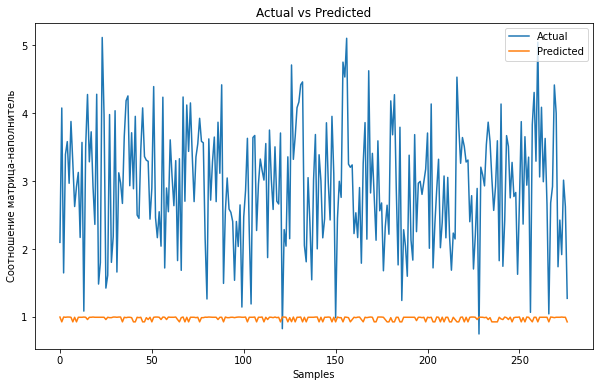

In [164]:
import matplotlib.pyplot as plt

# Make predictions on the test data
y_pred = model.predict(X_test)

# Plot actual vs predicted values
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Samples')
plt.ylabel('Соотношение матрица-наполнитель')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

